In [1]:
import numpy as np
import setting 
setting.load()
import noc
from noc.gramians import obsv
from noc.simulate import impulse
import matplotlib
import matplotlib.pyplot as plt
import noc.plotting as plotting 
plotting.load()

In [2]:
w = np.loadtxt("../data/w")
n = np.shape(w)[0]
a = w - np.eye(n)
tau = 20e-3

In [3]:
# dynamical nullspace
# pick initial conditions such that the first n1=20 neurons
# remain unmodulated while the other neurons are maximally modulated
n1 = 20
n2 = 180

def get_potent():
    # potent subspace
    c = np.eye(n)[0:n1,:] 
    q = obsv(a,c)
    b = np.eye(n)[:,n1:]
    btqb = b.T.dot(q).dot(b) 
    u, _, _ = np.linalg.svd(btqb)
    ut = b.dot(u).T
    ut = ut / np.linalg.norm(ut,axis=1).reshape(-1,1)
    # dynamical nullspace: bottom subspace of B^T Q B 
    return impulse(a,tau,n,ut[0,:],0.3)

def get_null(n_bases):
    # dynamical nullspace: top subspace of B^T Q B, with B hitting the top
    # obs subspace of network 1 
    z = np.eye(n)[:,n1:]
    q_a = obsv(a,np.eye(n)[n1:,:])
    ztqz = z.T.dot(q_a).dot(z)
    u, _, _ = np.linalg.svd(ztqz) 
    u = z.dot(u)
    u = u / np.linalg.norm(u,axis=0).reshape(1,-1)
    b = u[:,0:n_bases]
    bt = b.T
    q_b = obsv(a,np.eye(n)[0:n1,:])
    btqb = bt.dot(q_b).dot(b)
    u, _, _ = np.linalg.svd(btqb)
    ut = b.dot(u).T
    ut = ut / np.linalg.norm(ut,axis=1).reshape(-1,1)
    return impulse(a,tau,n,ut[-1,:],0.3)


In [4]:
ts, potent = get_potent()
_ , null = get_null(25)
potent_b = potent[:,0:n1:2]
null_b = null[:,0:n1:2]
potent_a = potent[:,n1:2*n1:2]
null_a = null[:,n1:2*n1:2]
items = [potent_a, potent_b, null_a, null_b]

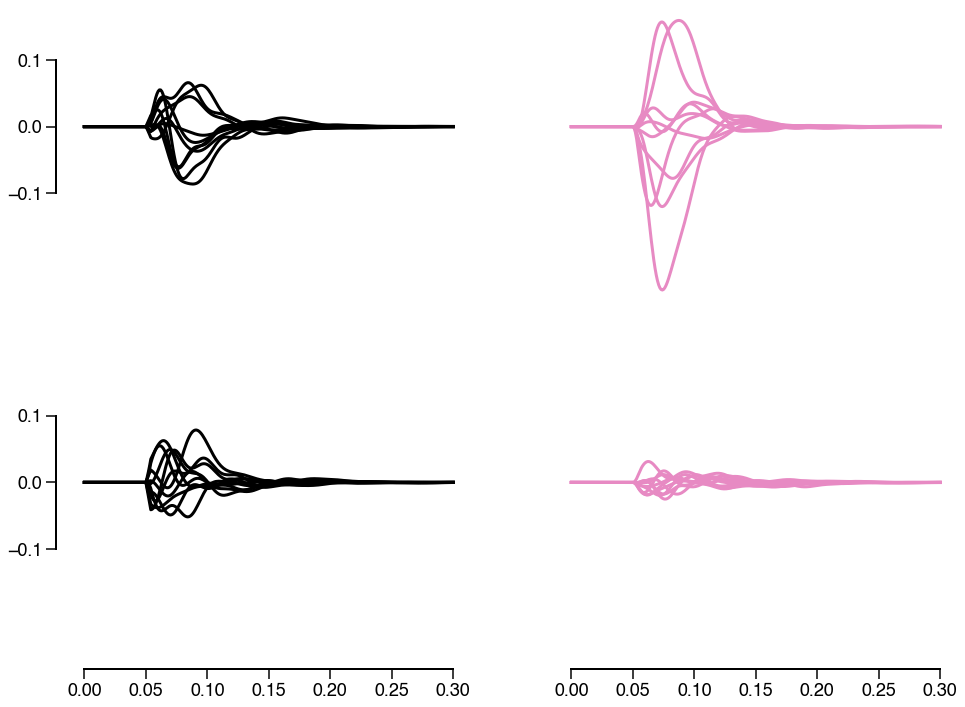

In [5]:
fig = plt.figure(figsize=(2*8, 2*6))
fig.patch.set_alpha(0)
axes = fig.subplots(2,2,sharey=True,sharex=True)
for i in range(4):
    col = i%2 
    row = int(i/2)
    item = items[i]
    plotting.adjust_spines(axes[row][col].spines)
    if col > 0:
        axes[row][col].tick_params(axis='y', which='both',length=0)
        axes[row][col].spines["left"].set_visible(False)
    if row == 0:
        axes[row][col].tick_params(axis='x', which='both',length=0)
        axes[row][col].spines["bottom"].set_visible(False)
    color = "black" if col == 0 else "#e78ac3"
    axes[row][col].plot(ts,item,color=color,linewidth=3)
plt.show()
